# Desafio 2

```{admonition} Desafio
:class: tip

Com um conjunto de dados da sua escolha, crie um gráfico não simplista e ainda não visto na disciplina utilizando em ggplot2.
Gráficos já contruídos na avaliação 1 não poderão ser utilizados.
```

## Diagrama de Gantt

Gráfico eficiente para mostrar a realização de atividades ou eventos em função do tempo. Cada item é inserido como uma barra que cobre o ponto incial até o ponto final e de forma bastante direta mostra qual a duração da atividade ou quais atividades ocorrem em um determinado intervalo.

## Desafio: Popularidade dos Presidentes do Brasil (1987 - 2016)

O diagrama construído para este desafio mostra a duração dos mandatos dos presidentes do Brasil de 1987 a 2016, adicionando um gradiente a cor de cada barra que mostra a evolução da popularidade em função do percentual da população que avaliou o mandato como Ótimo ou Bom.

In [10]:
library(ggplot2)
library(ggthemes)
library(dplyr)

presidentes_ordem <- c("Dilma", "Lula", "FHC", "Itamar", "Collor", "Sarney")
presidentes <- factor(presidentes_ordem, levels = presidentes_ordem)

presidentes

[1] Dilma  Lula   FHC    Itamar Collor Sarney
Levels: Dilma Lula FHC Itamar Collor Sarney

In [11]:
popularidades_df <- data.frame(
    Presidente = character(),
    Data = as.Date(character()),
    FimData = as.Date(character()),
    OtimoBom = integer(),
    Regular = integer(),
    RuimPessimo = integer(),
    NaoSabe = integer())

for(presidente in presidentes) {
    popularidade <- read.table(paste("./dados/popularidade_",
                                     presidente,
                                     ".txt",
                                     sep = ""),
                                header = TRUE)
    popularidade$Data <- as.Date(popularidade$Data, "%d.%m.%Y")
    popularidade$Presidente <- rep(presidente, nrow(popularidade))
    popularidades_df <- rbind(popularidades_df, popularidade)
}

popularidades_df$FimData <- lag(popularidades_df$Data)
popularidades_df$Presidente <- factor(popularidades_df$Presidente,
                                      levels = presidentes)

head(popularidades_df)
tail(popularidades_df)

,Data,OtimoBom,Regular,RuimPessimo,NaoSabe,Presidente,FimData
,<date>,<int>,<int>,<int>,<int>,<fct>,<date>
1,2016-04-01,13,24,63,1,Dilma,NA
2,2016-03-01,10,21,69,1,Dilma,2016-04-01
3,2016-02-01,11,25,64,1,Dilma,2016-03-01
4,2015-12-01,12,22,65,1,Dilma,2016-02-01
5,2015-11-01,10,22,67,1,Dilma,2015-12-01
6,2015-08-01,8,20,71,1,Dilma,2015-11-01


,Data,OtimoBom,Regular,RuimPessimo,NaoSabe,Presidente,FimData
,<date>,<int>,<int>,<int>,<int>,<fct>,<date>
139,1989-03-01,7,28,62,3,Sarney,1989-09-01
140,1988-12-01,8,25,65,2,Sarney,1989-03-01
141,1988-10-01,7,24,65,4,Sarney,1988-12-01
142,1988-03-01,10,23,65,2,Sarney,1988-10-01
143,1987-11-01,11,29,58,2,Sarney,1988-03-01
144,1987-05-01,9,35,54,2,Sarney,1987-11-01


Warning message:
"Removed 1 rows containing missing values (geom_segment)."


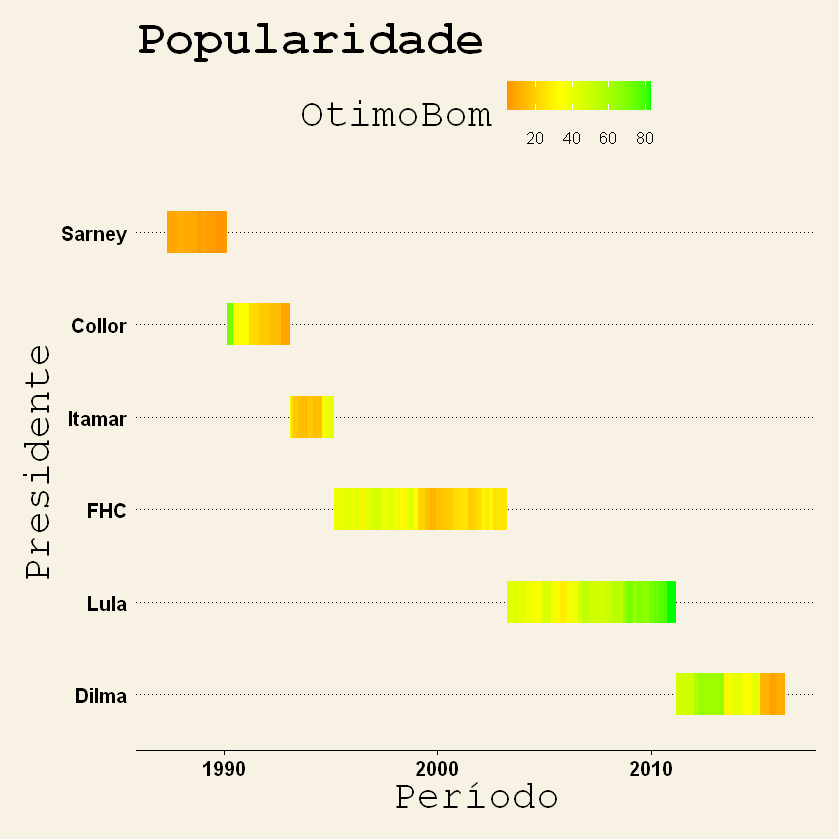

In [12]:
ggplot(popularidades_df) +
geom_segment(size = 12, aes(x = Data,
                            xend = FimData,
                            y = Presidente,
                            yend = Presidente,
                            color = OtimoBom)) +
scale_color_gradient2(low = "red",
                      mid = "yellow",
                      high = "green",
                      midpoint = 33) +
labs(title = "Popularidade", x = "Período", y = "Presidente") +
theme_wsj() +
theme(axis.title = element_text())

## Refêrencias

Dados: [Tabelas popularidade_<nome_presidente>.txt](https://github.com/gui-lisboa/estatisticaufpr/tree/main/visualizacao_de_dados/dados)

Fonte dos dados: [Acervo Antigo, Poder360](https://www.poder360.com.br/arquivo/)
 
Tutorial de referência: [How to Create a Gantt Chart in R Using ggplot2](https://www.statology.org/gantt-chart-r-ggplot2/)